In [97]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
# read downloaded csv file from location
df =pd.read_csv('energydata_complete.csv')
df


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [99]:
# check for non values or NaN
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

Text(0, 0.5, 'Temperature outside the building')

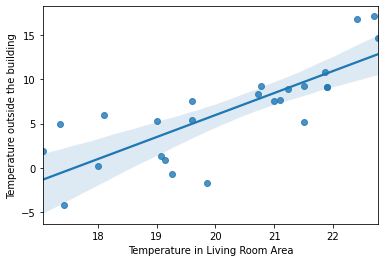

In [165]:
# question 12
#  linear modal showing relationship between T2 and T6

simple_linear_reg_df = df[['T2', 'T6']].sample(25, random_state=2)
sns.regplot(x='T2', y='T6', data=simple_linear_reg_df)
plt.xlabel('Temperature in Living Room Area')
plt.ylabel('Temperature outside the building')
# plt.show()



In [170]:
# question 12b starts here
# training the data set
X = df[['T2']]
Y = df[['T6']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [171]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_predict = regressor.predict(x_test)
y_predict

array([[ 3.36441357],
       [ 9.26320578],
       [14.47325012],
       ...,
       [11.60717029],
       [ 2.86821887],
       [12.22291723]])

In [172]:
# question 12b ends here
# R^2 value in two dec place
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_predict)
round(r2_score, 2)
# prints 0.65

0.65

In [169]:
# quesion 13 starts here
# multiple linear regression
X_df = df.drop(columns=['date', 'lights'])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(X_df), columns=X_df.columns)
X_df = normalised_df.drop(columns=['Appliances'])
target_df =normalised_df['Appliances']


In [173]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_df, target_df, test_size=0.3, random_state=42)

In [174]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)
y_pred

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [175]:
# question 13
# finding mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
round(mae, 2)
# prints 0.05

0.05

In [141]:
# print(linear_model.intercept_)

In [144]:
# # question 14
# finding residual sum of square
import numpy as np
RSS = np.sum(np.square(y_test-y_pred))
print(round(RSS, 2))
# prints 44.36

44.36


In [145]:
# question 15
# finding root mean square error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
round(rmse, 3)
# prints 0.087

0.087

In [176]:
# question 16
# finding coefficient of determination
from sklearn.metrics import r2_score
r2_scores = r2_score(y_test, y_pred)
round(r2_scores, 2)
# prints 0.15

0.15

In [147]:
print(linear_model.coef_)

[ 1.21576358e-02  5.80932931e-01 -2.64762713e-01 -4.97449145e-01
  2.81913174e-01  9.90768945e-02  3.77783448e-02  3.19307714e-02
  2.25555780e-03  1.68241576e-02  2.44015450e-01  3.28610637e-02
  1.21099797e-02 -5.07947659e-02  9.06576054e-02 -1.69711804e-01
 -2.01053376e-01 -2.86841911e-02 -3.18929901e-01  6.51172903e-04
 -6.82602080e-02  2.31032794e-02  1.08060812e-02  1.19596632e-01
 -5.17492546e-04 -5.17492546e-04]


In [153]:
# question 17 starts here
# feature weight of the model
col_name = X_df.columns
def get_weight_df(model, feat, col_name):
# this function returns the weight of every feature
    weight = pd.Series(model.coef_, feat.columns).sort_values()
    weight_df =pd.DataFrame(weight).reset_index()
    weight_df.columns = ['Features', col_name]
    weight_df[col_name].round(3)
    return weight_df

linear_model_weight = get_weight_df(linear_model, x_train, 'Linear_Model_Weight')
linear_model_weight


,Features,Linear_Model_Weight
0,RH_2,-0.497449
1,T_out,-0.318930
2,T2,-0.264763
3,T9,-0.201053
4,RH_8,-0.169712
5,RH_out,-0.068260
6,RH_7,-0.050795
7,RH_9,-0.028684
8,rv1,-0.000517
9,rv2,-0.000517


In [161]:
# question 18
# Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))
round(rmse_ridge, 3)
# no change to the rmse

0.087

In [162]:
# question 19
# lasso regression model
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [163]:
# new feature weight using lasso regrssion model
lasso_weight_df =get_weight_df(lasso_reg, x_train, 'Lasso_weight')
lasso_weight_df
# has 4 non-zero features

,Features,Lasso_weight
0,RH_out,-0.051356
1,RH_8,-0.008718
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Windspeed,0.000000
6,Press_mm_hg,-0.000000
7,T_out,0.000000
8,RH_9,-0.000000
9,T9,-0.000000


In [164]:
# question 20
# rmse with lasso regression
from sklearn.metrics import mean_squared_error
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred))
round(rmse_lasso, 3)

0.087